In [1]:
import os
import random
from glob import glob

import cv2
import scipy.io
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = "/media/xiaolong/9bbdf31a-3238-4691-845c-7f9126769abe/Dataset/stanford-cars-dataset/data"

In [3]:
imgs_train = glob(os.path.join(DATA_PATH, 'cars_train/cars_train', '*.jpg'))
imgs_test = glob(os.path.join(DATA_PATH, 'cars_test/cars_test', '*.jpg'))

imgs_train.__len__(), imgs_test.__len__()

(8144, 8041)

In [5]:
class_name_list = scipy.io.loadmat(os.path.join(DATA_PATH, 'car_devkit/devkit', 'cars_meta.mat'))['class_names'][0]
class_name_list = list(map(lambda x: x[0].replace('/', '-'), class_name_list)) # / to -

class_name_list[:10]

['AM General Hummer SUV 2000',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura Integra Type R 2001',
 'Acura ZDX Hatchback 2012',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012']

In [6]:
np.random.seed(66)
shuffle = np.random.permutation(imgs_train.__len__())
split_val = int(imgs_train.__len__() * 0.2)

shuffle, len(shuffle)

(array([2973, 4177, 7556, ...,  631,  828, 1044]), 8144)

In [12]:
train_anno_list = scipy.io.loadmat(
    os.path.join(DATA_PATH, 'car_devkit/devkit', 'cars_train_annos.mat'))['annotations'][0]

for anno in tqdm(train_anno_list):
    bb_x1 = anno[0][0][0]
    bb_y1 = anno[1][0][0]
    bb_x2 = anno[2][0][0]
    bb_y2 = anno[3][0][0]
    class_id = anno[4][0][0]
    fname = anno[5][0]
    img_id = int(fname.split('.')[0])
    img = cv2.imread(os.path.join(DATA_PATH, 'cars_train/cars_train', fname))
    
    margin = 16
    height, width = img.shape[:2]
    x1 = max(0, bb_x1 - margin)
    y1 = max(0, bb_y1 - margin)
    x2 = min(bb_x2 + margin, width)
    y2 = min(bb_y2 + margin, height)
    
    # img = cv2.resize(img[y1:y2, x1:x2], dsize=(224, 224))
    img = img[y1:y2, x1:x2]
    img_path = os.path.join(DATA_PATH, '{}', repr(class_name_list[int(class_id) - 1])) # {}: val or train
    img_path = img_path.format('val') if img_id in shuffle[:split_val] else img_path.format('train')
    # print(img_path)
    if not os.path.exists(img_path):
        os.makedirs(img_path)
    cv2.imwrite('{}/{}'.format(img_path, fname), img)


100%|██████████| 8144/8144 [01:36<00:00, 84.32it/s] 


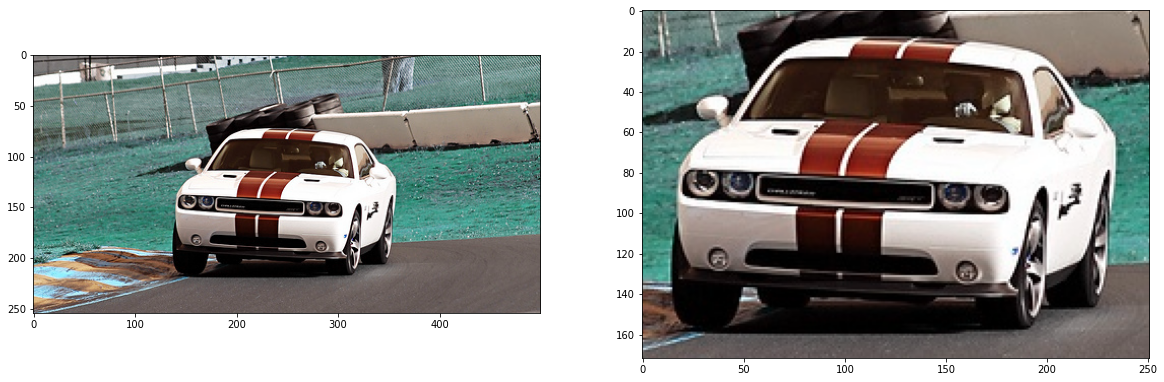

In [15]:
img_train = imgs_train[random.randint(0, imgs_train.__len__())]
imgs_train_bb = glob(os.path.join(DATA_PATH, 'train', '*/*.jpg'))

for path in imgs_train_bb:
    if img_train.rsplit('/')[-1] in path:
        img_train_bb = path
        break

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(cv2.imread(img_train))
plt.subplot(1,2,2)
plt.imshow(cv2.imread(img_train_bb))
plt.show()

In [21]:
test_anno_list = scipy.io.loadmat(
    os.path.join(DATA_PATH, 'car_devkit/devkit', 'cars_test_annos.mat'))['annotations'][0]

for anno in tqdm(test_anno_list):
    bb_x1 = anno[0][0][0]
    bb_y1 = anno[1][0][0]
    bb_x2 = anno[2][0][0]
    bb_y2 = anno[3][0][0]
    fname = anno[4][0]
    img = cv2.imread(os.path.join(DATA_PATH, 'cars_test/cars_test', fname))
    
    margin = 16
    height, width = img.shape[:2]
    x1 = max(0, bb_x1 - margin)
    y1 = max(0, bb_y1 - margin)
    x2 = min(bb_x2 + margin, width)
    y2 = min(bb_y2 + margin, height)
    
#     img = cv2.resize(img[y1:y2, x1:x2], dsize=(224, 224))
    img_path = os.path.join(DATA_PATH, 'test')
    if not os.path.exists(img_path):
        os.makedirs(img_path)
    cv2.imwrite('{}/{}'.format(img_path, fname), img[y1:y2, x1:x2])

100%|██████████| 8041/8041 [01:20<00:00, 99.41it/s] 


In [23]:
print('{:60s}'.format('class_name'), end='')
print("Count")
print('-' * 70)
for c in class_name_list:
    image_count = len(os.listdir(os.path.join(DATA_PATH, 'train', repr(c))))
    print('{:60s}{}'.format(c, image_count))

class_name                                                  Count
----------------------------------------------------------------------
AM General Hummer SUV 2000                                  32
Acura RL Sedan 2012                                         26
Acura TL Sedan 2012                                         35
Acura TL Type-S 2008                                        34
Acura TSX Sedan 2012                                        35
Acura Integra Type R 2001                                   32
Acura ZDX Hatchback 2012                                    33
Aston Martin V8 Vantage Convertible 2012                    36
Aston Martin V8 Vantage Coupe 2012                          31
Aston Martin Virage Convertible 2012                        20
Aston Martin Virage Coupe 2012                              33
Audi RS 4 Convertible 2008                                  29
Audi A5 Coupe 2012                                          36
Audi TTS Coupe 2012                         